Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **37 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Enjui Chang"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Heaps and Heapsort


## Question 1 [time estimate: 10 minutes]

Given the array `H=[39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]`, perform the following operations:
1. Draw the corresponding binary tree of H. Is the binary tree a valid max heap? Explain your answer.
2. Using as a model the drawing examples illustrated in Figure 6.2 of Cormen et al.,  draw a step-by-step transformation of the array above into a valid max heap. 
3. Now that you have obtained a valid max heap, write out the corresponding array that stores the valid max-heap.

Use as many cells as you wish for this question.

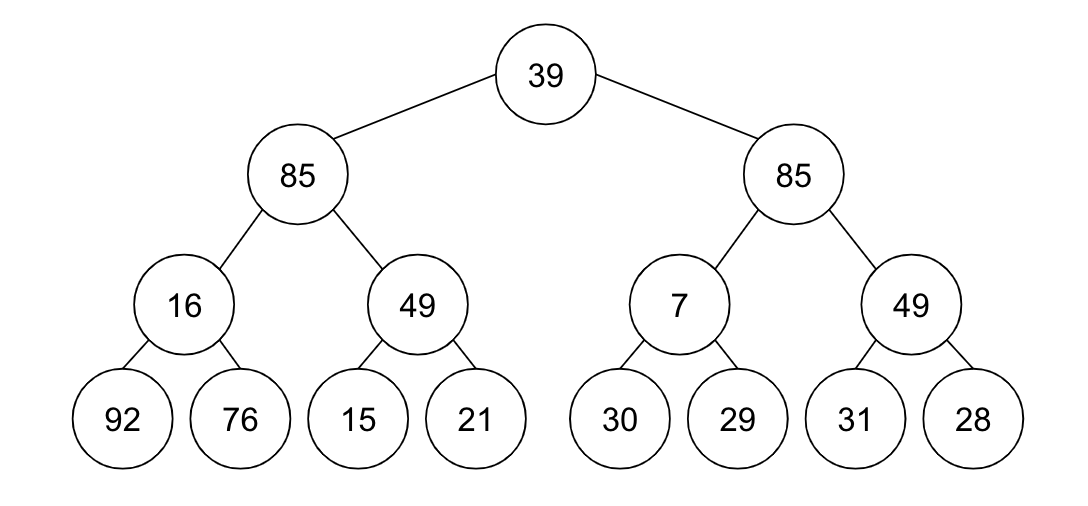

1. This is not valid max heap, because the root node is not the maximum value in the heap, which should be 92 rather than 39.

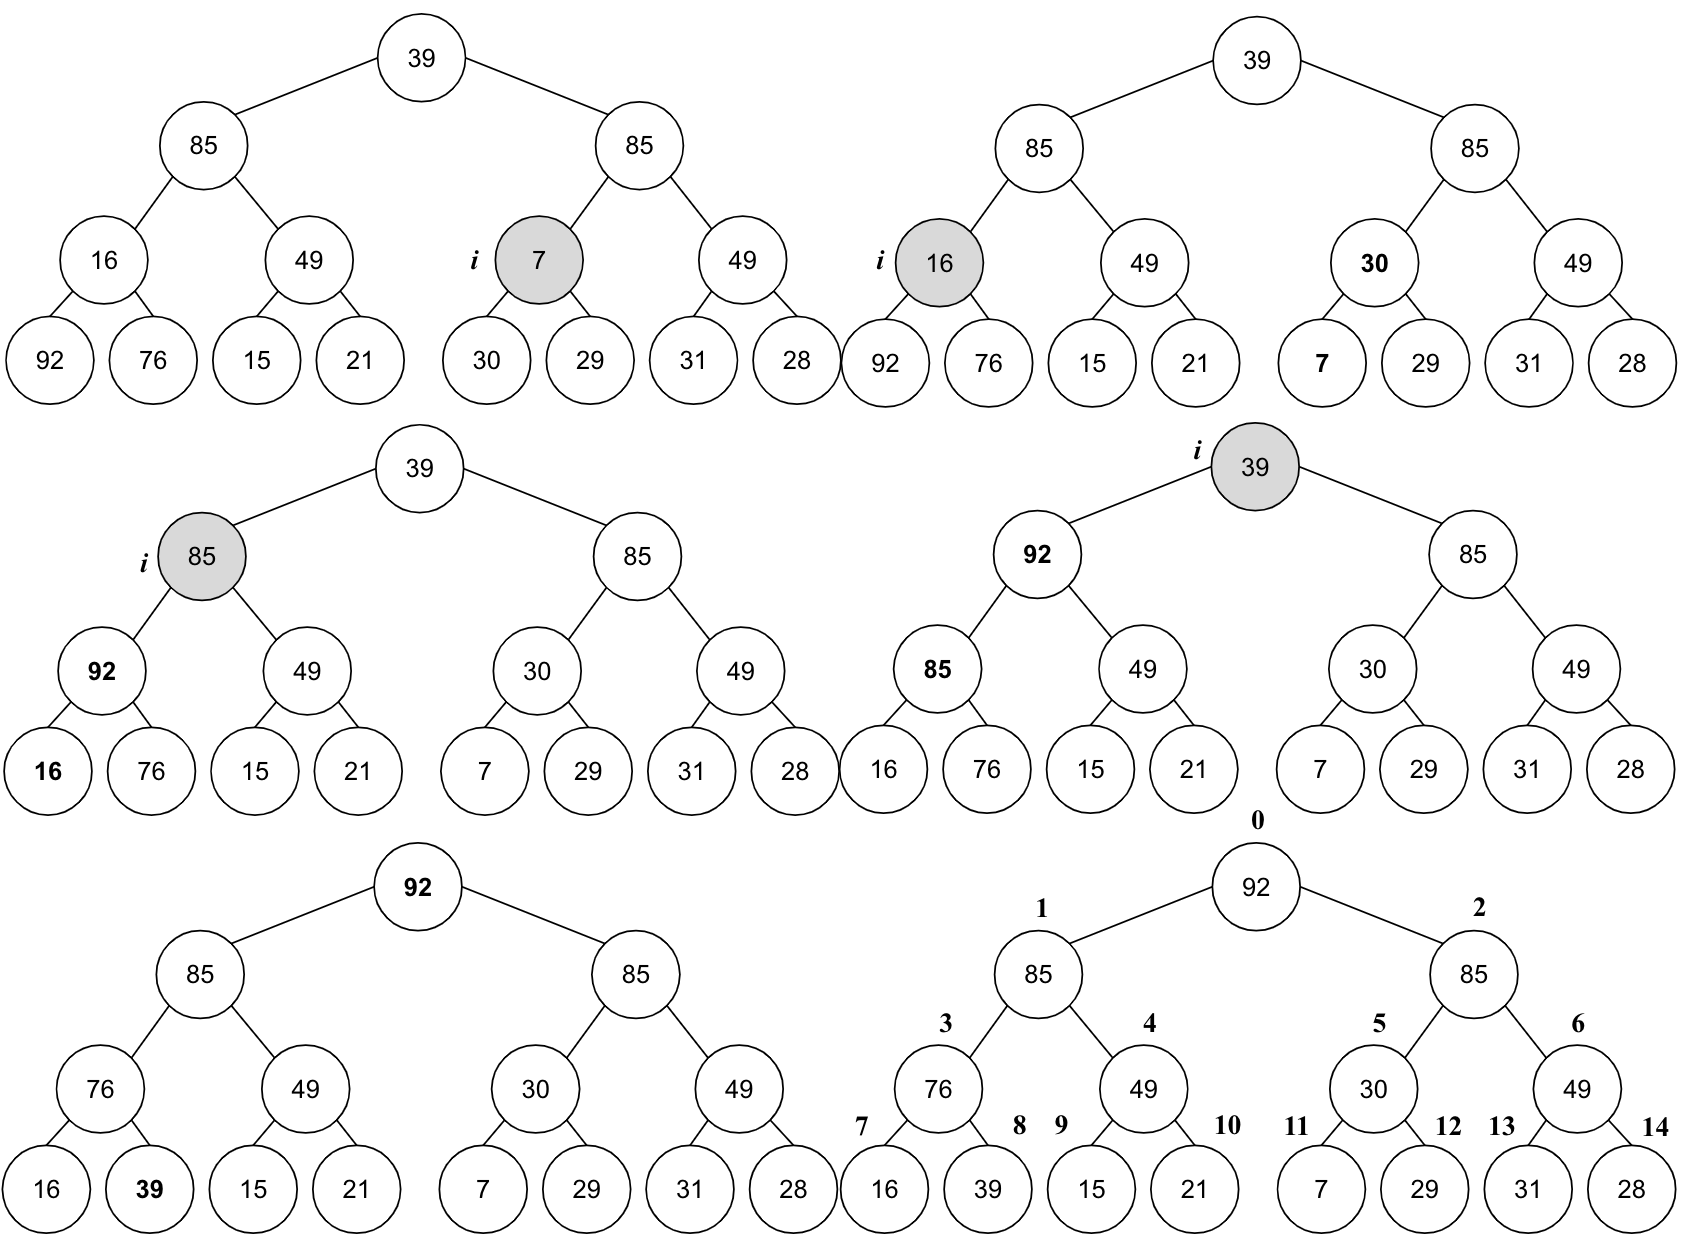

2. In the bottom-left figure, a couple of things happened in the recursion:
    - 92 switched with 39 at index change (0 <--> 1)
    - 39 switched with 85 at index change (1 <--> 3)
    - 39 switched with 76 at index change (3 <--> 8)

3. The correct valid maxium heap is [92, 85, 85, 76, 49, 30, 49, 16, 39, 15, 21, 7, 29, 31, 28].

## Question 2. 

Consider the following questions on the $MAX-HEAPIFY$ operation.

### Question 2a [time estimate: 5 minutes]

In the pseudocode of $MAX-HEAPIFY$ (Cormen et al., p.154, or you can view it [here](https://drive.google.com/open?id=1e_3jsX4-qQCfZXKMok_T6LPFh9FwtmT5)), what does A.heap-size mean and what is the idea behind the local variable largest? 


A.heap-size means the current largest value in the heap after removing the maximum element in the heapsort alogrithm. The idea behind is to iterate finding the largest element after removing the largest element of a heap each time to sort the array from the largest to smallest.

### Question 2b [time estimate: 2 minutes]

The functions $LEFT(i)$ and $RIGHT(i)$, lines 1 and 2 in the $MAX-HEAPIFY$ pseudocode, return the array index of the left and right child, respectively, of a node in a binary tree. From reading Section 6.1, you know that the input to both functions is an integer number, $i$, which corresponds to the array index of the parent node in the array. Review Section 6.1 for more information. Write a Python implementation of the functions $LEFT(i)$ and $RIGHT(i)$ by filling in the cells below.

In [2]:
def left(i):
    #returns the left child for i
    return 2*i+1

In [3]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

In [4]:
def right(i):
    #returns the right child for i
    return 2*i+2

In [5]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 2c [time estimate: 10 minutes]

Write a Python implementation of the MAX-HEAPIFY operation using the pseudocode above, and your newly written functions, `left` and `right`.

In [6]:
def heapify(heap, i):
    """
    Parameters
    ----------
    heap : list of floats
        Assume that the heap size is the length of the heap
        
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    #___find the left and right child___#
    l = left(i)
    r = right(i)
    
    #___see if the left child is larger than the parent___#
    if l < len(heap) and heap[l] > heap[i]:
        largest = l #track the largest element's index
    else: 
        largest = i #track the largest element's index
    
    #___see if the left child is larger than the parent___#
    if r < len(heap) and heap[r] > heap[largest]:
        largest = r #track the largest element's index
    
    #___exchange the largest child with the parent if child > parent___#
    if largest != i:
        heap[largest], heap[i] = heap[i], heap[largest] 
        #run the recursion to heapify following nodes
        heapify(heap, largest)
    
    return heap

In [7]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
assert(A == [85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28])


## Question 3 [time estimate: 3 minutes] 

Next, write a Python implementation of the BUILD_MAX_HEAP operation using the pseudocode provided in Section 6.3 of Cormen et. al. Test your Python implementation using the array in problem 1, and make sure your Python codes produce a valid max heap.

In [8]:
def build_max_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid max heap, in-place.
    
    """
    #____find the length of the heap___#
    heap = A[0:len(A)-1]
    
    #___iterate A through heapify downwards to retrive a maximum heap___#
    for i in range(len(A)//2-1,-1,-1):
        heapify(A, i)
    return A

In [9]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(A)
assert(A == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1])

## Question 4 [time estimate: 7 minutes]

Lastly, write Python implementations of the $MIN-HEAPIFY$ and $BUILD-MIN-HEAP$ operations for a min heap data structure. You can use your $MAX-HEAPIFY$ and $BUILD-MAX-HEAP$ Python function as models, just remember that the latter two functions support operations for the max heap data structure. Test your Python implementation of $BUILD-MIN-HEAP$ using the array in problem 1, and make sure your Python codes produce a valid min heap. 

In [10]:
def min_heapify(heap, i):
    """
    Parameters
    ----------
    heap : a list of floats
        Assume that the heap size is the length of the heap.
    
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    #___find the left and right child___#
    l = left(i)
    r = right(i)
    
    #___see if the left child is smaller than the parent___#
    if l < len(heap) and heap[l] < heap[i]:
        smallest = l #track the smallest element's index
    else: 
        smallest = i #track the smallest element's index
    
    #___see if the left child is smaller than the parent___#
    if r < len(heap) and heap[r] < heap[smallest]:
        smallest = r #track the smallest element's index
    
    #___exchange the smaller child with the parent if child < parent___#
    if smallest != i:
        heap[smallest], heap[i] = heap[i], heap[smallest] 
        #run the recursion to heapify following nodes
        min_heapify(heap, smallest)
    
    return heap


In [11]:
def build_min_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid min heap, in-place.
    
    """
    #____find the length of the heap___#
    heap = A[0:len(A)-1]
    
    #___iterate A through min_heapify downwards to retrive a minimum heap___#
    for i in range(len(A)//2-1,-1,-1):
        min_heapify(A, i)
    return A

In [12]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_min_heap(A)
assert(A == [1, 2, 3, 4, 7, 9, 10, 14, 8, 16])

In [13]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 